In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()
import numpy as np

In [32]:
read = pd.read_pickle('../Pickle/read.pkl')

In [33]:
read = read[read['is_read'] == 1]

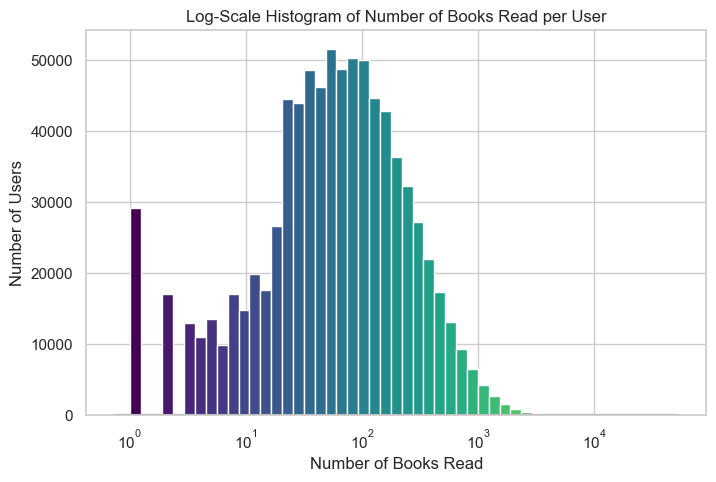

In [34]:
plt.figure(figsize=(8, 5))

books_per_user = read.groupby('user_id').size()

log_bins = np.logspace(np.log10(1), np.log10(books_per_user.max()), num=50)

hist_data, bins = np.histogram(books_per_user, bins=log_bins)

viridis = plt.cm.viridis
colors = viridis(np.linspace(0, 1, len(hist_data)))

for i in range(len(hist_data)):
    plt.bar(bins[i], hist_data[i], width=bins[i+1] - bins[i], color=colors[i], align='edge')

plt.xscale('log')
sns.kdeplot(books_per_user, color='gray', linewidth=2)

plt.title('Log-Scale Histogram of Number of Books Read per User')
plt.xlabel('Number of Books Read')
plt.ylabel('Number of Users')

plt.show()


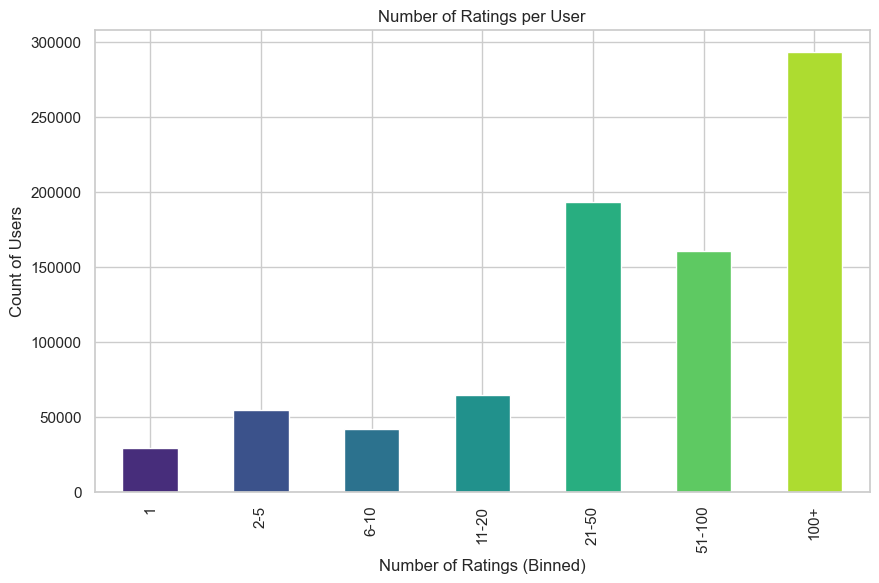

In [6]:
rating_counts = read['user_id'].value_counts()
bins = [0, 1, 5, 10, 20, 50, 100, rating_counts.max()]
labels = ['1', '2-5', '6-10', '11-20', '21-50', '51-100', '100+']
review_counts_binned = pd.cut(rating_counts, bins=bins, labels=labels, include_lowest=True)
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(review_counts_binned.value_counts(sort=False)))
plt.figure(figsize=(10, 6))
review_counts_binned.value_counts(sort=False).plot(kind='bar', color=palette)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings (Binned)')
plt.ylabel('Count of Users')
plt.show()


In [ ]:
import pickle
def load_data():
    books_list = []

    with open('../Pickle/books.pkl', 'rb') as file:
        while True:
            try:
                chunk = pickle.load(file)
                books_list.append(chunk)
            except EOFError:
                break  
    books = pd.concat(books_list, ignore_index=True)
    books = books.drop_duplicates(subset='title', keep='first')
    return books

books = load_data()

In [7]:
reviews = pd.read_pickle('../Pickle/reviews.pkl')

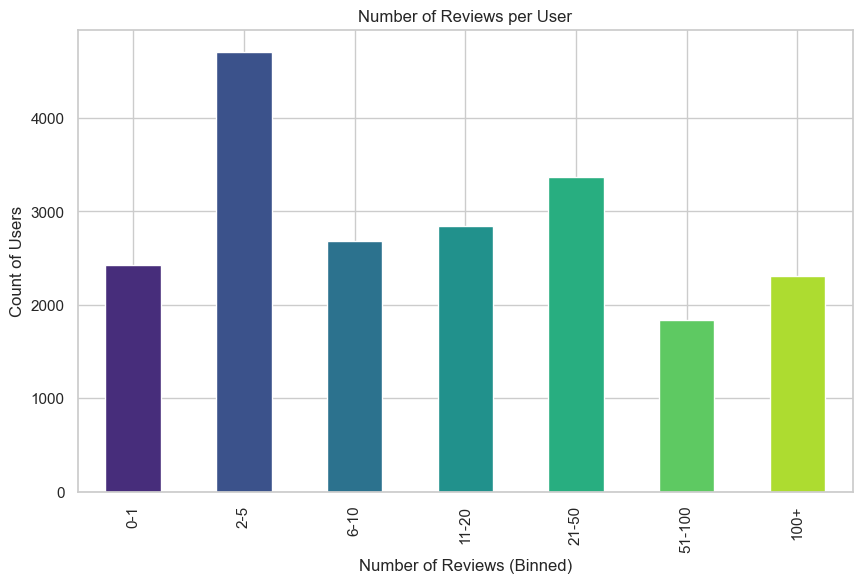

In [10]:
review_counts = reviews['user_id'].value_counts()
bins = [0, 1, 5, 10, 20, 50, 100, review_counts.max()]
labels = ['0-1', '2-5', '6-10', '11-20', '21-50', '51-100', '100+']
review_counts_binned = pd.cut(review_counts, bins=bins, labels=labels, include_lowest=True)
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(review_counts_binned.value_counts(sort=False)))
plt.figure(figsize=(10, 6))
review_counts_binned.value_counts(sort=False).plot(kind='bar', color=palette)
plt.title('Number of Reviews per User')
plt.xlabel('Number of Reviews (Binned)')
plt.ylabel('Count of Users')
plt.show()


In [ ]:
interactions = pd.read_pickle('../Pickle/interactions.pkl')

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=read, palette='viridis')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=interactions, palette='viridis')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
books['filtered_genres'] = books['filtered_genres'].apply(lambda x: x.split(', '))
genre_list = [genre for genres in books['filtered_genres'] for genre in genres]
genre_counts = pd.Series(genre_list).value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
print(genre_counts)

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Number of Books')
plt.ylabel('Genres')
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(genre_counts['Count'], labels=genre_counts['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(genre_counts)))
plt.title('Genre Distribution')
plt.show()

C:\Users\maddy\AppData\Local\Temp\ipykernel_21588\683433786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=reviews['n_votes'], palette='viridis')


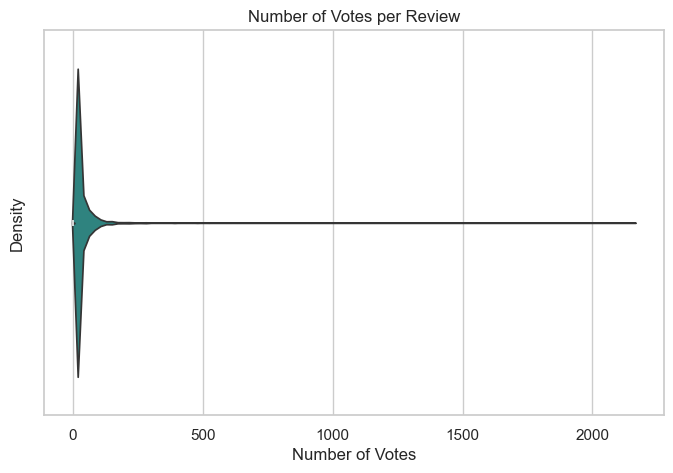

In [70]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=reviews['n_votes'], palette='viridis')

plt.title('Number of Votes per Review')
plt.xlabel('Number of Votes')
plt.ylabel('Density')

plt.show()


In [ ]:
reviews['review_length'] = reviews['review_text'].progress_apply(len)
correlation_df = reviews[['rating', 'n_votes', 'review_length', 'n_comments']]
corr_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', cbar=True)
plt.title('Correlation Matrix')
plt.show()
